In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('train.csv')
data.drop('Id', axis=1, inplace=True)
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,Female,...,3,0,12,2,11,7,6,7,4,1
1,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,Female,...,3,2,7,2,3,2,1,1,2,1
2,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,Male,...,3,0,12,3,9,7,7,3,5,1
3,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,Male,...,3,0,18,2,7,7,1,7,4,1
4,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,Male,...,3,1,10,2,10,7,7,8,1,1


In [3]:
# data.info()

In [4]:
X = data.drop(['Attrition','EmployeeNumber'], axis=1)
y = data['Attrition']
Cat_col = [col for col in X.columns if X[col].dtype=='object']
Cat_col

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [5]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
ohe_X = pd.DataFrame(ohe.fit_transform(X[Cat_col]))
ohe_X.index = X.index
X_num = X.drop(Cat_col, axis=1)
X_training = pd.concat([X_num, ohe_X], axis=1)
X_training.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,...,18,19,20,21,22,23,24,25,26,27
0,30,2,3,3,3,4,2564,0,14,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,36,12,4,3,3,3,4663,9,12,3,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,55,2,1,3,3,4,5160,4,16,3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,39,24,1,1,3,4,4108,7,13,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,37,3,3,3,3,3,9434,1,15,3,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [6]:
X_training.shape

(1628, 47)

In [5]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_training,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [6]:
print(model.feature_importances_)

[0.03941359 0.0335713  0.02790838 0.03687428 0.02813333 0.034066
 0.0355044  0.02782401 0.02861925 0.01216686 0.03026952 0.03899628
 0.02819515 0.03334509 0.03292851 0.02609151 0.02955471 0.03236789
 0.         0.00769917 0.02090183 0.0150732  0.00457009 0.01331425
 0.01317844 0.00316171 0.01832585 0.00933056 0.01892774 0.00650155
 0.01595502 0.01835627 0.01946965 0.01177544 0.00475807 0.01579392
 0.00727631 0.01258797 0.00692317 0.01216119 0.01333898 0.02073794
 0.0133503  0.017551   0.02699094 0.05175473 0.04440466]


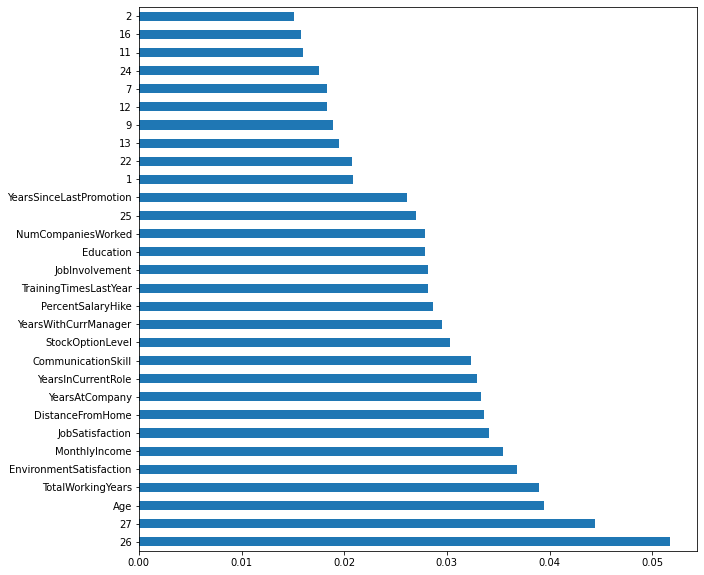

In [7]:
feat_importances = pd.Series(model.feature_importances_, index=X_training.columns)

plt.figure(figsize=(10,10))
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

In [8]:
dict(feat_importances)

{'Age': 0.03941358832690999,
 'DistanceFromHome': 0.03357129933370928,
 'Education': 0.027908383200094197,
 'EnvironmentSatisfaction': 0.036874283807888375,
 'JobInvolvement': 0.028133329771378817,
 'JobSatisfaction': 0.03406599599890705,
 'MonthlyIncome': 0.03550439825895733,
 'NumCompaniesWorked': 0.027824005524315895,
 'PercentSalaryHike': 0.02861924872757972,
 'PerformanceRating': 0.012166856185817997,
 'StockOptionLevel': 0.030269523637149888,
 'TotalWorkingYears': 0.03899628279081914,
 'TrainingTimesLastYear': 0.02819514689386856,
 'YearsAtCompany': 0.0333450869597481,
 'YearsInCurrentRole': 0.0329285081705996,
 'YearsSinceLastPromotion': 0.026091508864711344,
 'YearsWithCurrManager': 0.029554709898233326,
 'CommunicationSkill': 0.03236789315192292,
 'Behaviour': 0.0,
 0: 0.007699172761089539,
 1: 0.020901825539705134,
 2: 0.015073195944233144,
 3: 0.004570088512695013,
 4: 0.013314247431057002,
 5: 0.013178444907293025,
 6: 0.0031617075225120893,
 7: 0.018325852475185967,
 8: 0.

In [9]:
top30 = list(feat_importances.nlargest(28).index)
top30

[26,
 27,
 'Age',
 'TotalWorkingYears',
 'EnvironmentSatisfaction',
 'MonthlyIncome',
 'JobSatisfaction',
 'DistanceFromHome',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'CommunicationSkill',
 'StockOptionLevel',
 'YearsWithCurrManager',
 'PercentSalaryHike',
 'TrainingTimesLastYear',
 'JobInvolvement',
 'Education',
 'NumCompaniesWorked',
 25,
 'YearsSinceLastPromotion',
 1,
 22,
 13,
 9,
 12,
 7,
 24,
 11]

In [10]:
X_top30 = X_training[top30]
X_top30.head()

,26,27,Age,TotalWorkingYears,EnvironmentSatisfaction,MonthlyIncome,JobSatisfaction,DistanceFromHome,YearsAtCompany,YearsInCurrentRole,...,25,YearsSinceLastPromotion,1,22,13,9,12,7,24,11
0,1.0,0.0,30,12,3,2564,4,2,11,7,...,1.0,6,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,1.0,36,7,3,4663,3,12,3,2,...,0.0,1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,1.0,0.0,55,12,3,5160,4,2,9,7,...,1.0,7,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,39,18,1,4108,4,24,7,7,...,1.0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,37,10,3,9434,3,3,10,7,...,0.0,7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_top30, y, test_size=0.2, random_state=420)

In [66]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=10,n_estimators=200, criterion='entropy', random_state=420)
model.fit(X_train, y_train)
predict_train = model.predict_proba(X_train)[:,1]
predict_test  = model.predict_proba(X_test)[:,1]

model.score(X_test, y_test)

0.9693251533742331

In [67]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, model.predict(X_test))

array([[150,  10],
       [  0, 166]])

In [68]:
confusion_matrix(y_train, model.predict(X_train))

array([[682,   1],
       [  0, 619]])

In [69]:
test_ = pd.read_csv('test.csv')
test = test_.drop('Id', axis=1)
test.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,28,Travel_Rarely,Research & Development,9,3,Medical,377,4,Male,3,...,4,1,5,3,5,2,0,4,5,1
1,31,Travel_Rarely,Sales,6,4,Medical,653,1,Male,4,...,4,2,13,4,7,7,5,7,3,1
2,37,Travel_Rarely,Research & Development,6,3,Medical,474,3,Male,4,...,3,2,13,2,7,7,6,7,4,1
3,42,Travel_Rarely,Research & Development,1,2,Life Sciences,827,4,Female,2,...,3,1,8,4,4,3,0,2,5,1
4,45,Non-Travel,Research & Development,4,2,Life Sciences,972,3,Male,3,...,3,0,9,5,9,7,0,8,2,1


In [70]:
ohe_test = pd.DataFrame(ohe.fit_transform(test[Cat_col]))
ohe_test.index = test.index
test_num = test.drop(Cat_col, axis=1)
test_data = pd.concat([test_num, ohe_test], axis=1)

test_data_top30 = test_data[top30]

In [71]:
prediction = model.predict_proba(test_data_top30)[:,1]

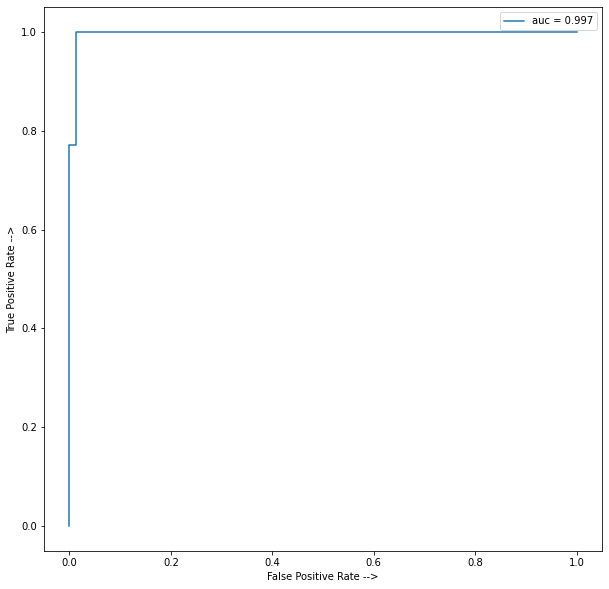

In [72]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test, predict_test)
auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, linestyle='-', label='auc = %0.3f'%auc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

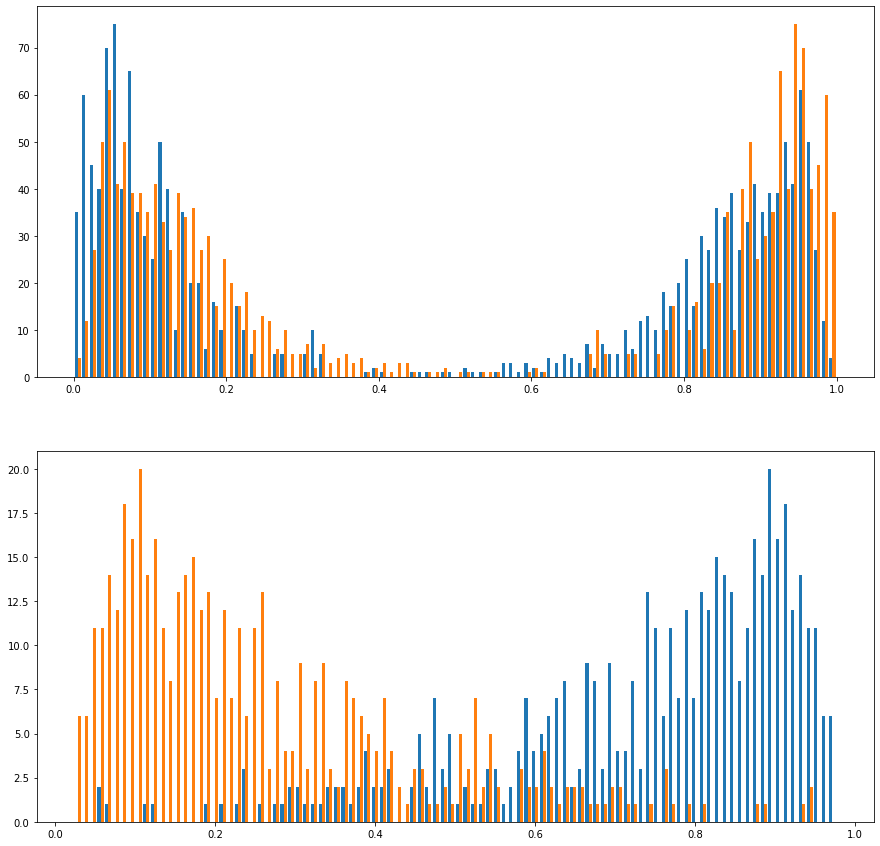

In [73]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(15,15))

ax1.hist(model.predict_proba(X_top30),bins=100)
ax2.hist(model.predict_proba(test_data_top30), bins=100)
plt.show()

In [74]:
output = pd.Series(prediction)
output_final = pd.concat([test_['Id'], output], axis=1)
output_final.columns=['Id', 'Attrition']
output_final.set_index('Id',inplace=True)
output_final.describe()

,Attrition
count,470.000000
mean,0.258080
std,0.189525
min,0.023162
25%,0.111741
50%,0.201544
75%,0.360787
max,0.947878
